In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

import torch
from torch import nn, optim
from torch.nn import functional as F
# import dataloader from torch
#import dataset
# import toTesor
import torchvision
from torchvision import transforms
from torchvision.io import read_image
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import sys
from PIL import Image
import cv2
from torchvision.transforms import Compose, RandomCrop, ToTensor, ToPILImage, CenterCrop, Resize

from dataset import TrainDatasetFromFolder
from model import Generator, Discriminator, GeneratorLoss
from tqdm import tqdm
from torch.autograd import Variable

c:\Users\Suren\.conda\envs\torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.autograd.set_detect_anomaly(True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
UPSCALE_FACTOR = 16
CROP_SIZE = 128
N_EPOCHS = 5

# Get All Models

In [4]:
netG_bi = Generator(UPSCALE_FACTOR)
netG_he = Generator(UPSCALE_FACTOR)
netG_nn = Generator(UPSCALE_FACTOR)

In [5]:
netG_bi = netG_bi.to(device)
netG_he = netG_he.to(device)
netG_nn = netG_nn.to(device)

# Load Models

In [6]:
netG_bi.load_state_dict(torch.load("bicubic_45_epochs_16_128.pth", map_location=device))
netG_bi.eval()

netG_he.load_state_dict(torch.load("hamming_30_epochs_16_128.pth", map_location=device))
netG_he.eval()

netG_nn.load_state_dict(torch.load("NN_30_epochs_16_128.pth", map_location=device))
netG_nn.eval()


Generator(
  (block1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): PReLU(num_parameters=1)
  )
  (block2): ResidualBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (prelu): PReLU(num_parameters=1)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (block3): ResidualBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (prelu): PReLU(num_parameters=1)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (block4): ResidualBlock(
    (conv1)

In [13]:
img = Image.open("data/original/train/image_0.jpg")
# resize the image to 96x96
img = img.resize((96 , 24))

# convert to tensor
img = ToTensor()(img)

# add batch dimension
img = img.unsqueeze(0)

img = img.to(device)


In [14]:
bicubic = netG_bi(img)

In [15]:
hamming =  netG_he(img)

In [16]:
nearest = netG_nn(img)

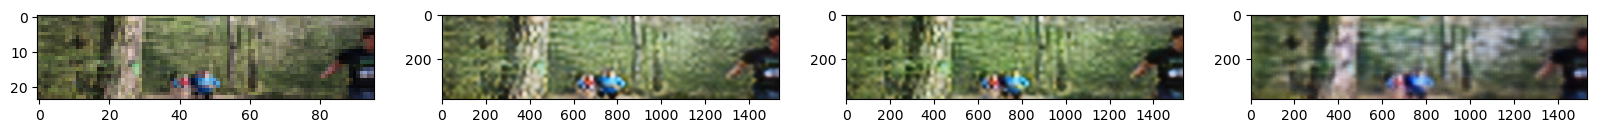

In [21]:

# show bicubic hamming and nn
plt.figure(figsize=(20, 10))
#show low resolution image
plt.subplot(1, 4, 1)
plt.imshow(img.squeeze(0).detach().cpu().permute(1, 2, 0))
plt.subplot(1, 4, 2)
plt.imshow(bicubic.squeeze(0).detach().cpu().permute(1, 2, 0))
plt.subplot(1, 4, 3)
plt.imshow(hamming.squeeze(0).detach().cpu().permute(1, 2, 0))
plt.subplot(1, 4, 4)
plt.imshow(nearest.squeeze(0).detach().cpu().permute(1, 2, 0))

# save images
plt.savefig("predicted/comparison.png")
plt.show()